# Phase One Project, Corrales


# IMDB Top 1000 Movie

In [45]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
plt.style.use('seaborn')

import requests
from requests import get
from bs4 import BeautifulSoup

from time import sleep
from random import randint



In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [3]:
## wrap the range within the fuction
for i in tqdm(range(5)):
    sleep(2)

<ipython-input-3-adbed5ab6edc>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(5)):


In [4]:
# Creating the containers for each section we are scraping

titles = []
years = []
time = []
genres = []
imdb_ratings = []
metascores = []
votes = []
us_gross = []



In [5]:
# Translated titles in English for the movies listed

headers = {'Accept-Language': 'en-US, en;q=0.5'}

In [6]:
pages = np.arange(1, 1001, 50)
pages

array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])

# Webscrape

In [7]:
# Storing each of the urls of 50 movies per page
for page in tqdm(pages):
    page = requests.get('https://www.imdb.com/search/title/?groups=top_1000&start=' + str(page) + '&ref_=adv_nxt', headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')

# focusing on the are of the html where the data we need to capture is located
    movie_div = soup.find_all('div', class_='lister-item mode-advanced')

# Setting runtime bettween the loops to for 5-10 seconds on random. 
# This is was spoken about during the webscraping lecture to avoid looking like a bot
    sleep(randint(5,10))

    # Creating the for loop
    for container in movie_div:

    # Scraping for movie titles
        name = container.h3.a.text
        titles.append(name)

    # Scraping the movie years
        year = container.h3.find('span', class_='lister-item-year').text
        years.append(year)

    # Scraping for movie runtime
        runtime = container.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else '-'
        time.append(runtime)

    # Scraping the movie genres
        genre = container.find('span', class_='genre').text if container.find('span', class_='metascore') else '-'
        genres.append(genre)

    # Scraping for ratings
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)

    # Scraping for metascore
        metascore = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
        metascores.append(metascore)
        
    # Scraping for votes, but if no gross earnings to leave "-"
        nv = container.find_all('span', attrs={'name':'nv'})
        vote = nv[0].text
        votes.append(vote)
        grosses = nv[1].text if len(nv) > 1 else '-'
        us_gross.append(grosses)

<ipython-input-7-ea0e8292e571>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm(pages):


In [8]:
# creating a Dataframe of all the data scraped

#= pd.DataFrame
df_dict = ({'movie':titles,'year':years,'time_minute':time,'genre':genres,'imdb_rating':imdb_ratings,'metascore':metascores,'vote':votes,'gross_earning':us_gross})

IMDB_TOP1000_movies = pd.DataFrame(df_dict)

In [9]:
IMDB_TOP1000_movies

,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
0,The Trial of the Chicago 7,(2020),129 min,"\nDrama, History, Thriller",7.9,76,"52,953",-
1,Halloween,(1978),91 min,"\nHorror, Thriller",7.8,87,"229,947",$47.00M
2,Tenet,(2020),150 min,"\nAction, Sci-Fi",7.8,69,"143,836",$53.80M
3,The Untouchables,(1987),119 min,"\nCrime, Drama, Thriller",7.9,79,"276,756",$76.27M
4,The Nightmare Before Christmas,(1993),76 min,"\nAnimation, Family, Fantasy",8.0,82,"293,284",$75.08M
...,...,...,...,...,...,...,...,...
995,Vizontele,(2001),110 min,-,8.0,-,"32,724",-
996,The Breath,(2009),128 min,-,8.0,-,"31,461",-
997,Andaz Apna Apna,(1994),160 min,-,8.2,-,"48,729",-
998,Drishyam,(2013),160 min,-,8.3,-,"30,133",-


# Data Cleansing

In [10]:
#check the data types
IMDB_TOP1000_movies.dtypes

movie             object
year              object
time_minute       object
genre             object
imdb_rating      float64
metascore         object
vote              object
gross_earning     object
dtype: object

In [11]:
# Cleaning 'year' column
#IMDB_TOP1000_movies['year'] = IMDB_TOP1000_movies['year'].replace('(','')
IMDB_TOP1000_movies['year'] = IMDB_TOP1000_movies['year'].str.extract('(\d+)').astype(int)

IMDB_TOP1000_movies.head(3)

,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
0,The Trial of the Chicago 7,2020,129 min,"\nDrama, History, Thriller",7.9,76,"52,953",-
1,Halloween,1978,91 min,"\nHorror, Thriller",7.8,87,"229,947",$47.00M
2,Tenet,2020,150 min,"\nAction, Sci-Fi",7.8,69,"143,836",$53.80M


In [12]:
IMDB_TOP1000_movies.dtypes

movie             object
year               int64
time_minute       object
genre             object
imdb_rating      float64
metascore         object
vote              object
gross_earning     object
dtype: object

In [13]:
#Cleaning the 'time_minute' column
IMDB_TOP1000_movies['time_minute'] = IMDB_TOP1000_movies['time_minute'].str.extract('(\d+)').astype(int)

IMDB_TOP1000_movies.head(3)

,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
0,The Trial of the Chicago 7,2020,129,"\nDrama, History, Thriller",7.9,76,"52,953",-
1,Halloween,1978,91,"\nHorror, Thriller",7.8,87,"229,947",$47.00M
2,Tenet,2020,150,"\nAction, Sci-Fi",7.8,69,"143,836",$53.80M


In [14]:
IMDB_TOP1000_movies.dtypes

movie             object
year               int64
time_minute        int64
genre             object
imdb_rating      float64
metascore         object
vote              object
gross_earning     object
dtype: object

In [15]:
# Cleaning 'metascore' column and convert it to float and if there are dashes turn it into NaN
IMDB_TOP1000_movies['metascore'] = IMDB_TOP1000_movies['metascore'].str.extract('(\d+)')
IMDB_TOP1000_movies['metascore'] = pd.to_numeric(IMDB_TOP1000_movies['metascore'], errors='coerce')

In [16]:
IMDB_TOP1000_movies.dtypes

movie             object
year               int64
time_minute        int64
genre             object
imdb_rating      float64
metascore        float64
vote              object
gross_earning     object
dtype: object

In [17]:
# Cleaning 'vote' column
IMDB_TOP1000_movies['vote'] = IMDB_TOP1000_movies['vote'].str.replace(',', '').astype(int)
IMDB_TOP1000_movies.head(3)

,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
0,The Trial of the Chicago 7,2020,129,"\nDrama, History, Thriller",7.9,76.0,52953,-
1,Halloween,1978,91,"\nHorror, Thriller",7.8,87.0,229947,$47.00M
2,Tenet,2020,150,"\nAction, Sci-Fi",7.8,69.0,143836,$53.80M


In [18]:
IMDB_TOP1000_movies.dtypes

movie             object
year               int64
time_minute        int64
genre             object
imdb_rating      float64
metascore        float64
vote               int64
gross_earning     object
dtype: object

In [19]:
# Cleaning 'gross_earning' column
# left strip $ and right strip M 
# convert it to float and if there are dashes turn it into NaN
IMDB_TOP1000_movies['gross_earning'] = IMDB_TOP1000_movies['gross_earning'].map(lambda x: x.lstrip('$').rstrip('M'))
IMDB_TOP1000_movies['gross_earning'] = pd.to_numeric(IMDB_TOP1000_movies['gross_earning'], errors='coerce')
IMDB_TOP1000_movies.head(3)

,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
0,The Trial of the Chicago 7,2020,129,"\nDrama, History, Thriller",7.9,76.0,52953,NaN
1,Halloween,1978,91,"\nHorror, Thriller",7.8,87.0,229947,47.0
2,Tenet,2020,150,"\nAction, Sci-Fi",7.8,69.0,143836,53.8


In [20]:
IMDB_TOP1000_movies.dtypes

movie             object
year               int64
time_minute        int64
genre             object
imdb_rating      float64
metascore        float64
vote               int64
gross_earning    float64
dtype: object

In [21]:
#Cleaning 'genre' column
IMDB_TOP1000_movies['genre'] = IMDB_TOP1000_movies['genre'].str.replace('\n','')
IMDB_TOP1000_movies['genre'] = IMDB_TOP1000_movies['genre'].str.replace('-','NaN')
IMDB_TOP1000_movies['genre'] = IMDB_TOP1000_movies['genre'].str.replace('SciNaNFi','Sci Fi')

IMDB_TOP1000_movies.head(3)

,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
0,The Trial of the Chicago 7,2020,129,"Drama, History, Thriller",7.9,76.0,52953,NaN
1,Halloween,1978,91,"Horror, Thriller",7.8,87.0,229947,47.0
2,Tenet,2020,150,"Action, Sci Fi",7.8,69.0,143836,53.8


In [22]:
IMDB_TOP1000_movies

,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
0,The Trial of the Chicago 7,2020,129,"Drama, History, Thriller",7.9,76.0,52953,NaN
1,Halloween,1978,91,"Horror, Thriller",7.8,87.0,229947,47.00
2,Tenet,2020,150,"Action, Sci Fi",7.8,69.0,143836,53.80
3,The Untouchables,1987,119,"Crime, Drama, Thriller",7.9,79.0,276756,76.27
4,The Nightmare Before Christmas,1993,76,"Animation, Family, Fantasy",8.0,82.0,293284,75.08
...,...,...,...,...,...,...,...,...
995,Vizontele,2001,110,NaN,8.0,NaN,32724,NaN
996,The Breath,2009,128,NaN,8.0,NaN,31461,NaN
997,Andaz Apna Apna,1994,160,NaN,8.2,NaN,48729,NaN
998,Drishyam,2013,160,NaN,8.3,NaN,30133,NaN


In [23]:
#Checking for null and Nan values
IMDB_TOP1000_movies.isnull().sum

<bound method DataFrame.sum of      movie   year  time_minute  genre  imdb_rating  metascore   vote  \
0    False  False        False  False        False      False  False   
1    False  False        False  False        False      False  False   
2    False  False        False  False        False      False  False   
3    False  False        False  False        False      False  False   
4    False  False        False  False        False      False  False   
..     ...    ...          ...    ...          ...        ...    ...   
995  False  False        False  False        False       True  False   
996  False  False        False  False        False       True  False   
997  False  False        False  False        False       True  False   
998  False  False        False  False        False       True  False   
999  False  False        False  False        False       True  False   

     gross_earning  
0             True  
1            False  
2            False  
3            False  

In [24]:
#Dropping null and Nan values
IMDB_TOP1000_movies = IMDB_TOP1000_movies.dropna()
IMDB_TOP1000_movies.isnull().sum

<bound method DataFrame.sum of      movie   year  time_minute  genre  imdb_rating  metascore   vote  \
1    False  False        False  False        False      False  False   
2    False  False        False  False        False      False  False   
3    False  False        False  False        False      False  False   
4    False  False        False  False        False      False  False   
6    False  False        False  False        False      False  False   
..     ...    ...          ...    ...          ...        ...    ...   
974  False  False        False  False        False      False  False   
978  False  False        False  False        False      False  False   
983  False  False        False  False        False      False  False   
984  False  False        False  False        False      False  False   
985  False  False        False  False        False      False  False   

     gross_earning  
1            False  
2            False  
3            False  
4            False  

In [25]:
#Creating the CSV
IMDB_TOP1000_movies.to_csv('TOP1000_test.csv')

In [26]:
IMDB_TOP1000_movies.isnull().sum

<bound method DataFrame.sum of      movie   year  time_minute  genre  imdb_rating  metascore   vote  \
1    False  False        False  False        False      False  False   
2    False  False        False  False        False      False  False   
3    False  False        False  False        False      False  False   
4    False  False        False  False        False      False  False   
6    False  False        False  False        False      False  False   
..     ...    ...          ...    ...          ...        ...    ...   
974  False  False        False  False        False      False  False   
978  False  False        False  False        False      False  False   
983  False  False        False  False        False      False  False   
984  False  False        False  False        False      False  False   
985  False  False        False  False        False      False  False   

     gross_earning  
1            False  
2            False  
3            False  
4            False  

# Data Analysis

In [27]:
#Loading the data
IMDB_df = pd.read_csv('TOP1000_test.csv')

In [28]:
#Checking summary stats
IMDB_df.describe()

,Unnamed: 0,year,time_minute,imdb_rating,metascore,vote,gross_earning
count,760.000000,760.000000,760.000000,760.000000,760.000000,7.600000e+02,760.000000
mean,420.088158,1994.986842,123.188158,7.931711,77.368421,3.349773e+05,75.128013
std,264.433162,19.517563,26.016821,0.289804,12.535002,3.436865e+05,112.765798
min,1.000000,1925.000000,66.000000,7.600000,28.000000,2.567700e+04,0.000000
25%,194.750000,1985.750000,104.000000,7.700000,70.000000,8.762125e+04,5.182500
50%,391.500000,2001.000000,120.000000,7.900000,78.000000,2.148220e+05,32.385000
75%,626.500000,2009.000000,136.000000,8.100000,86.000000,4.677370e+05,100.040000
max,985.000000,2020.000000,238.000000,9.300000,100.000000,2.304536e+06,936.660000


In [29]:
# finding the median gross eanring 
Movies_gross_earninsg_over75 = IMDB_df.loc[IMDB_df['gross_earning'] >= 75]
Movies_gross_earninsg_over75

,Unnamed: 0,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
2,3,The Untouchables,1987,119,"Crime, Drama, Thriller",7.9,79.0,276756,76.27
3,4,The Nightmare Before Christmas,1993,76,"Animation, Family, Fantasy",8.0,82.0,293284,75.08
4,6,Harry Potter and the Sorcerer's Stone,2001,152,"Adventure, Family, Fantasy",7.6,64.0,640187,317.58
7,9,Knives Out,2019,130,"Comedy, Crime, Drama",7.9,82.0,413379,165.36
10,12,The Hunt for Red October,1990,135,"Action, Adventure, Thriller",7.6,58.0,177745,122.01
...,...,...,...,...,...,...,...,...,...
562,615,Fiddler on the Roof,1971,181,"Drama, Family, Musical",8.0,67.0,38781,80.50
613,690,Ray,2004,152,"Biography, Drama, Music",7.7,73.0,136992,75.33
629,714,Fantasia,1940,125,"Animation, Family, Fantasy",7.7,96.0,87520,76.41
652,764,The Muppet Movie,1979,95,"Adventure, Comedy, Family",7.6,74.0,32249,76.66


In [30]:
#Creating a new dataframe for gross earning over 75Million and narrowing down the years to 2010-present
ten_years_df = Movies_gross_earninsg_over75.loc[Movies_gross_earninsg_over75['year'] >= 2010]
ten_years_df

,Unnamed: 0,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
7,9,Knives Out,2019,130,"Comedy, Crime, Drama",7.9,82.0,413379,165.36
12,14,Once Upon a Time... In Hollywood,2019,161,"Comedy, Drama",7.6,83.0,527209,142.50
13,15,Coco,2017,105,"Animation, Adventure, Family",8.4,81.0,363684,209.73
16,18,1917,2019,119,"Drama, War",8.3,78.0,387911,159.23
18,21,Joker,2019,122,"Crime, Drama, Thriller",8.5,59.0,892851,335.45
...,...,...,...,...,...,...,...,...,...
446,469,The Fighter,2010,116,"Biography, Drama, Sport",7.8,79.0,336621,93.62
468,496,The Lego Movie,2014,100,"Animation, Action, Adventure",7.7,83.0,321281,257.76
482,514,Straight Outta Compton,2015,147,"Biography, Drama, History",7.8,72.0,177405,161.20
509,549,How to Train Your Dragon 2,2014,102,"Animation, Action, Adventure",7.8,76.0,301289,177.00


In [31]:
# Per Ijeoma's analysis we see see that Avengers: Endgame is the ideal candidate to model as a potential movie
ten_years_df[ten_years_df['movie'] == "Avengers: Endgame"]

,Unnamed: 0,movie,year,time_minute,genre,imdb_rating,metascore,vote,gross_earning
19,22,Avengers: Endgame,2019,181,"Action, Adventure, Drama",8.4,78.0,778254,858.37


In [35]:
# Checking the average gross_earning to rating
ten_years_df.groupby(['imdb_rating'])['gross_earning'].mean().sort_values

<bound method Series.sort_values of imdb_rating
7.6    229.950000
7.7    205.670000
7.8    236.719231
7.9    270.640000
8.0    226.532857
8.1    231.540000
8.2    109.996667
8.3    287.115000
8.4    424.685000
8.5    335.450000
8.6    188.020000
8.8    292.580000
Name: gross_earning, dtype: float64>

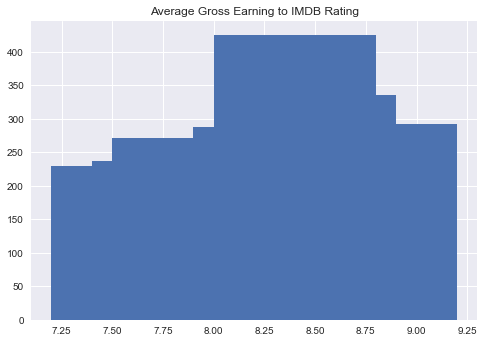

In [67]:
#Visualizing the data. Concluding that a rating above 7.6 and up will have have a success of a high lifetime gross earning
y = ten_years_df.groupby(['imdb_rating'])['gross_earning'].mean()
x = y.index

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title('Average Gross Earning to IMDB Rating')

fig.savefig('Average Gross Earning to IMDB Rating.png')



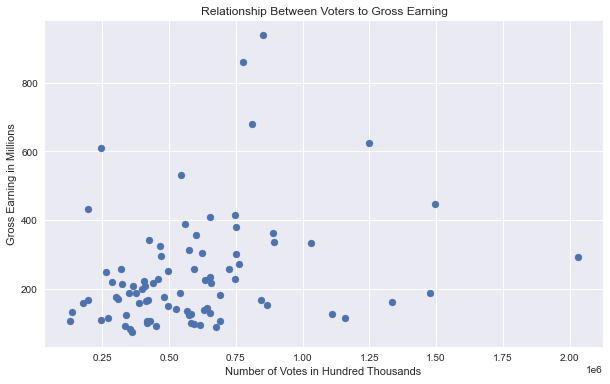

In [70]:
# Visualizing the Relationship to voters to gross earnings
# Result is not a strong correlation.
tackle_figure, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Relationship Between Voters to Gross Earning')
ax.set_xlabel('Number of Votes in Hundred Thousands ')
ax.set_ylabel('Gross Earning in Millions')

x1 = ten_years_df.vote
y1 = ten_years_df.gross_earning

ax.scatter(x1, y1)



fig.savefig('Relationship Between Voters to Gross Earning.png')


In [39]:
# Doing some continued analysis on genre. Also seen, Action, Adventure
top_10_genre = ten_years_df['genre'].value_counts()[0:10]
top_10_genre

Action, Adventure, Sci Fi                   12
Animation, Adventure, Comedy                 7
Action, Adventure, Comedy                    6
Animation, Action, Adventure                 6
Action, Adventure, Drama                     3
Biography, Drama, History                    3
Adventure, Drama, Fantasy                    2
Biography, Drama, Sport                      2
Action, Adventure, Thriller                  2
Biography, Drama, Thriller                   2
Name: genre, dtype: int64

In [42]:
# Checking avergae gross earning for the top five genre
top_5_genre = ten_years_df.groupby(['genre'])['gross_earning'].mean().sort_values().tail(5)
top_5_genre

genre
Animation, Adventure, Comedy                312.252857
Crime, Drama, Thriller                      335.450000
Action, Adventure, Sci Fi                   382.895833
Action, Adventure, Drama                    416.853333
Action, Adventure                           448.140000
Name: gross_earning, dtype: float64

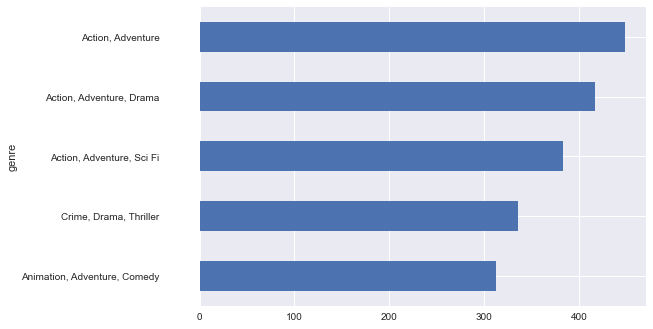

In [43]:
#Ploting a bar chart
top_5_genre.plot(kind='barh')

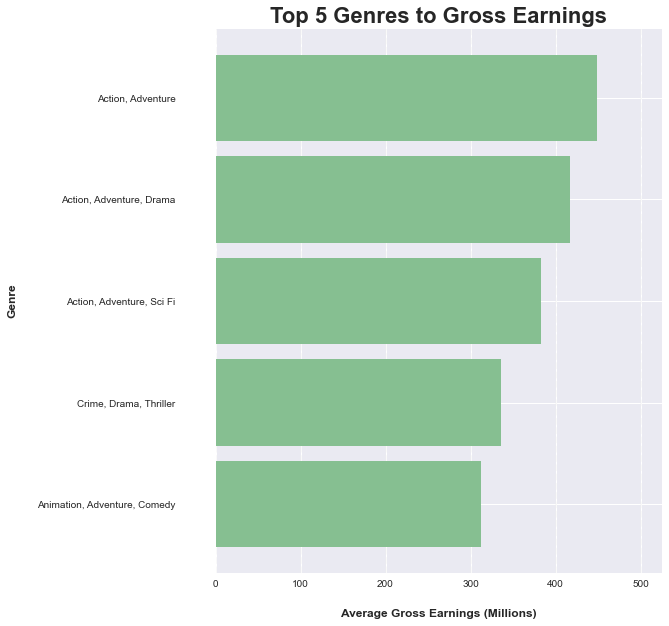

In [71]:
#Creating a better bar graph
ax = top_5_genre.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Average Gross Earnings (Millions)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Genre", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

ax.set_title("Top 5 Genres to Gross Earnings", weight='bold', size=22)

fig.savefig('Top 5 Genres to Gross Earnings.png')

In [47]:
# As we can see above movies with the genre containing: Action, Adventure, and Drama have the most success in lifetime gross earning success.

In [49]:
# Checking Average Gross Earning for IMDB Ratings
rating = ten_years_df.groupby(['imdb_rating'])['gross_earning'].mean().sort_values(ascending = True).tail(10)
rating

imdb_rating
7.7    205.670000
8.0    226.532857
7.6    229.950000
8.1    231.540000
7.8    236.719231
7.9    270.640000
8.3    287.115000
8.8    292.580000
8.5    335.450000
8.4    424.685000
Name: gross_earning, dtype: float64

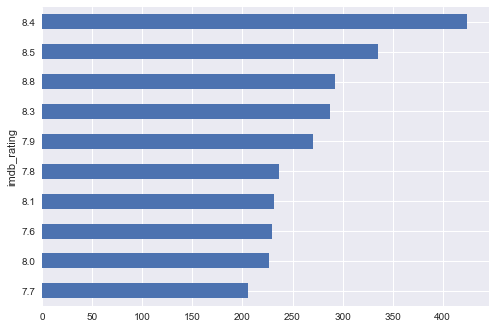

In [50]:
#Ploting the findings 
rating.plot(kind='barh')

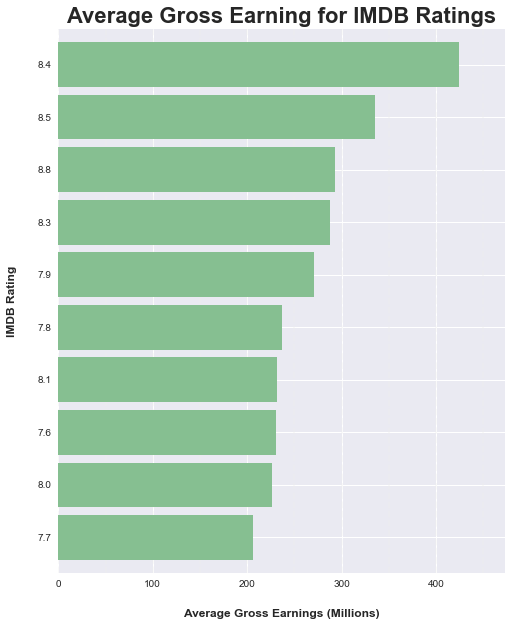

In [61]:
# Cleaning the graph to repreent the data clearly

ax = rating.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Average Gross Earnings (Millions)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("IMDB Rating", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

ax.set_title("Average Gross Earning for IMDB Ratings", weight='bold', size=22)

plt.savefig('Average Gross Earning for IMDB Ratings.png')

In [ ]:
# We can assume from above that movies that get an IMDB rating of over the 7.3 mark will the the high grossing earning average in their liftime.

In [53]:
#In this section we will visualize which genre grouping has the highest IMDB rating on average
genre = ten_years_df.groupby(['genre'])['imdb_rating'].mean().sort_values(ascending = True)
genre

genre
Animation, Comedy, Crime                    7.600000
Action, Crime, Music                        7.600000
Comedy, Drama                               7.600000
Drama, Music, Romance                       7.600000
Drama, Sport                                7.600000
Biography, Drama, Sport                     7.700000
Action, Adventure, Thriller                 7.700000
Comedy, Drama, Romance                      7.700000
Drama, Sci Fi, Thriller                     7.700000
Horror, Mystery, Thriller                   7.700000
Adventure, Family, Fantasy                  7.700000
Biography, Drama                            7.700000
Drama, Romance                              7.750000
Crime, Drama, Mystery                       7.800000
Adventure, Biography, Crime                 7.800000
Adventure, Fantasy                          7.800000
Action, Adventure, Comedy                   7.816667
Biography, Drama, Thriller                  7.850000
Biography, Drama, History               

Text(0.5, 1.0, 'Average IMDB Rating for Genre')

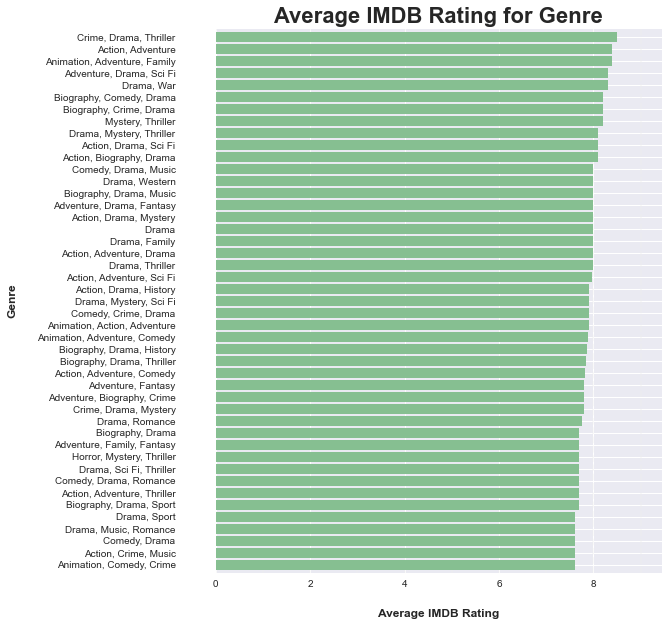

In [54]:
#plotting the findings to visually represent
ax = genre.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Average IMDB Rating", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Genre", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

ax.set_title("Average IMDB Rating for Genre", weight='bold', size=22)



In [ ]:
# Again we can conclude that movies with Action and Adventure score the highest.

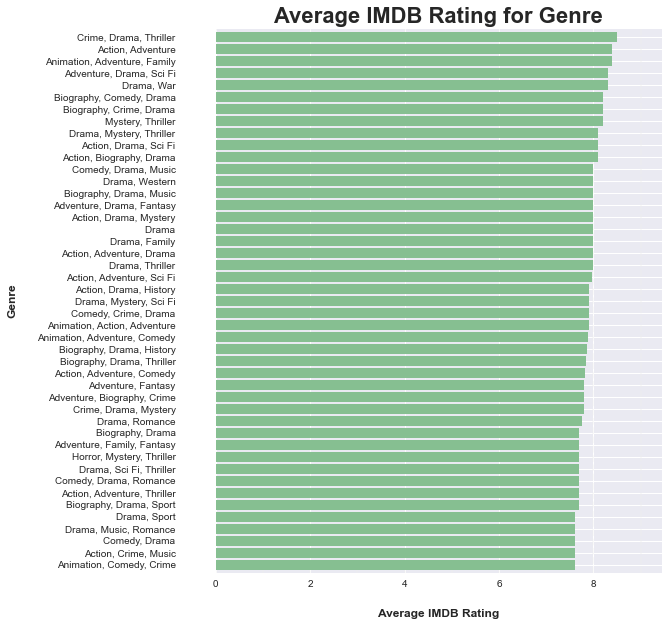

In [62]:

#Ploting scatter to see if their is a relationship
ax = genre.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Average IMDB Rating", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Genre", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

ax.set_title("Average IMDB Rating for Genre", weight='bold', size=22)

plt.savefig('Average IMDB Rating for Genre.png')

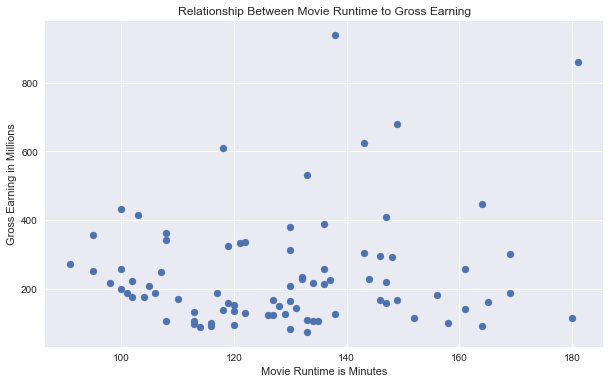

In [63]:
#The chart below is Relationship Between Movie Runtime to Gross Earning, for a fture next step.
# This shows that movies between the 100 min and 140 min will have a success in gross earnings up to 400Million. However, it is not a strong positive, but only a slight relationship
# We can consider the chart below as a preview of future next steps in understanding budget, production, and future projection for global release.

tackle_figure, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Relationship Between Movie Runtime to Gross Earning')
ax.set_xlabel('Movie Runtime is Minutes')
ax.set_ylabel('Gross Earning in Millions')

x2 = ten_years_df.time_minute
y2 = ten_years_df.gross_earning

ax.scatter(x2, y2)

plt.savefig('Relationship Between Movie Runtime to Gross Earning.png')